In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from utility import analysis_parameters as ap

In [2]:
ap.home_dir

'/home/disk/eos12/hillmanb/scream/dyamond2/'

In [3]:
file = ap.test_data_file_name("h0", "02-06")
print(file)

/home/disk/eos12/hillmanb/scream/dyamond2/256x512/SCREAMv0.SCREAM-DY2.ne1024pg2.20201127.eam.h0.2020-02-06-00000.nc


In [6]:
# nc.Dataset(file, 'r')
ds = xr.open_dataset(file, engine="netcdf4")

In [20]:
cldhgh_trop = ds["CLDHGH"].where(abs(ds.lat)<20)
cldmed_trop = ds["CLDMED"].where(abs(ds.lat)<20)
cldlow_trop = ds["CLDLOW"].where(abs(ds.lat)<20)
cldtot_trop = ds["CLDTOT"].where(abs(ds.lat)<20)

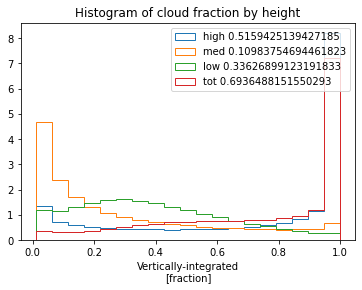

In [24]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
bins=np.linspace(0.01,1,20)
cldhgh_trop.plot.hist(bins=bins, ax=ax, density=True, histtype="step", label="high {}".format(np.nanmean(cldhgh_trop)))
cldmed_trop.plot.hist(bins=bins, ax=ax, density=True, histtype="step", label="med {}".format(np.nanmean(cldmed_trop)))
cldlow_trop.plot.hist(bins=bins, ax=ax, density=True, histtype="step", label="low {}".format(np.nanmean(cldlow_trop)))
cldtot_trop.plot.hist(bins=bins, ax=ax, density=True, histtype="step", label="tot {}".format(np.nanmean(cldtot_trop)))
plt.legend()
plt.title("Histogram of cloud fraction by height")
plt.show()

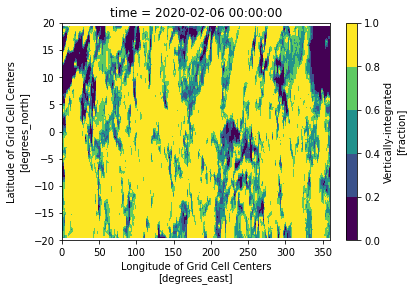

In [28]:
fig = plt.figure(figsize=(12,3))

cldtot_trop[0].plot.contourf()
plt.ylim([-20,20])
plt.show()